# Muhammad Khubaib - mk07218

In [471]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [472]:
dataframe = pd.read_csv('CreditCardData.csv')

In [474]:
#Q1
dataframe.replace('?', pd.NA, inplace=True)
dataframe.dropna(inplace=True)

In [476]:
#Q2 - Replacing to Yes/No

dataframe['Approved'] = dataframe['Approved'].replace('-', '0')
dataframe['Approved'] = dataframe['Approved'].replace('+', '1')
dataframe['Approved'] = dataframe['Approved'].astype(int)

In [477]:
#Q3 & Q4
dataframe['ZipCode'] = dataframe['ZipCode'].astype(float)
dataframe['Age'] = dataframe['Age'].astype(float)
categories = dataframe.select_dtypes(exclude=['int', 'float'])  #one hot encoding for the non-numeric columns
categories= categories.columns.tolist()
df34 = pd.get_dummies(dataframe, columns=[i for i in categories])
Train, Test = train_test_split(df34, test_size=0.3, random_state=99)


In [479]:
#Q5
dt = tree.DecisionTreeClassifier(random_state=100)
X = df34.drop('Approved', axis=1)
Y = df34['Approved']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
dtmod = dt.fit(X_train, Y_train)
imp = dtmod.feature_importances_
print(imp)

[0.04913104 0.0619599  0.03684836 0.05777507 0.07335405 0.06299288
 0.         0.01294875 0.         0.         0.00734207 0.
 0.01546751 0.         0.         0.0201675  0.00174273 0.
 0.00709034 0.         0.00122405 0.         0.01037337 0.00667461
 0.00964958 0.         0.         0.00580144 0.02535719 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.51199466 0.         0.         0.
 0.01769964 0.00440524 0.         0.        ]


In [480]:
train_pred = dtmod.predict(X_train)
trainacc = accuracy_score(train_pred, Y_train)
print(trainacc*100)

100.0


In [483]:
test_pred = dtmod.predict(X_test)
trainacc2 = accuracy_score(test_pred , Y_test)
print(trainacc2*100)

81.63265306122449


In [485]:
text_representation = tree.export_text(dtmod)
print(text_representation)

|--- feature_38 <= 0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_1 <= 0.21
|   |   |   |--- feature_2 <= 1.08
|   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |--- feature_0 <= 16.21
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  16.21
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_23 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  1.08
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.21
|   |   |   |--- feature_27 <= 0.50
|   |   |   |   |--- feature_1 <= 1.52
|   |   |   |   |   |--- feature_2 <= 1.33
|   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |--- feature_4 <= 104.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.15
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  0.15
|   |   |   |   |   |   |   |   |   |--- feature_43 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |  

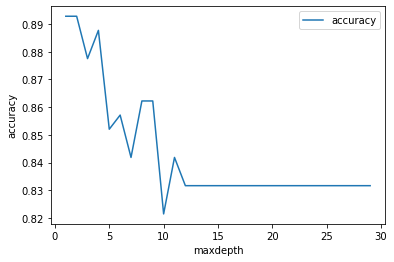

In [487]:
maxdepth = []
accuracy = []
for i in range(1, 30):
    dtmodt = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=99)
    dtmodt.fit(X_train, Y_train)
    pred = dtmodt.predict(X_test)
    accuracy.append(accuracy_score(pred, Y_test))
    maxdepth.append(i)

df = pd.DataFrame({'accuracy': pd.Series(accuracy), 'maxdepth': pd.Series(maxdepth)})
plt.plot('maxdepth', 'accuracy', data=df)
plt.xlabel('maxdepth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])
plt.show()

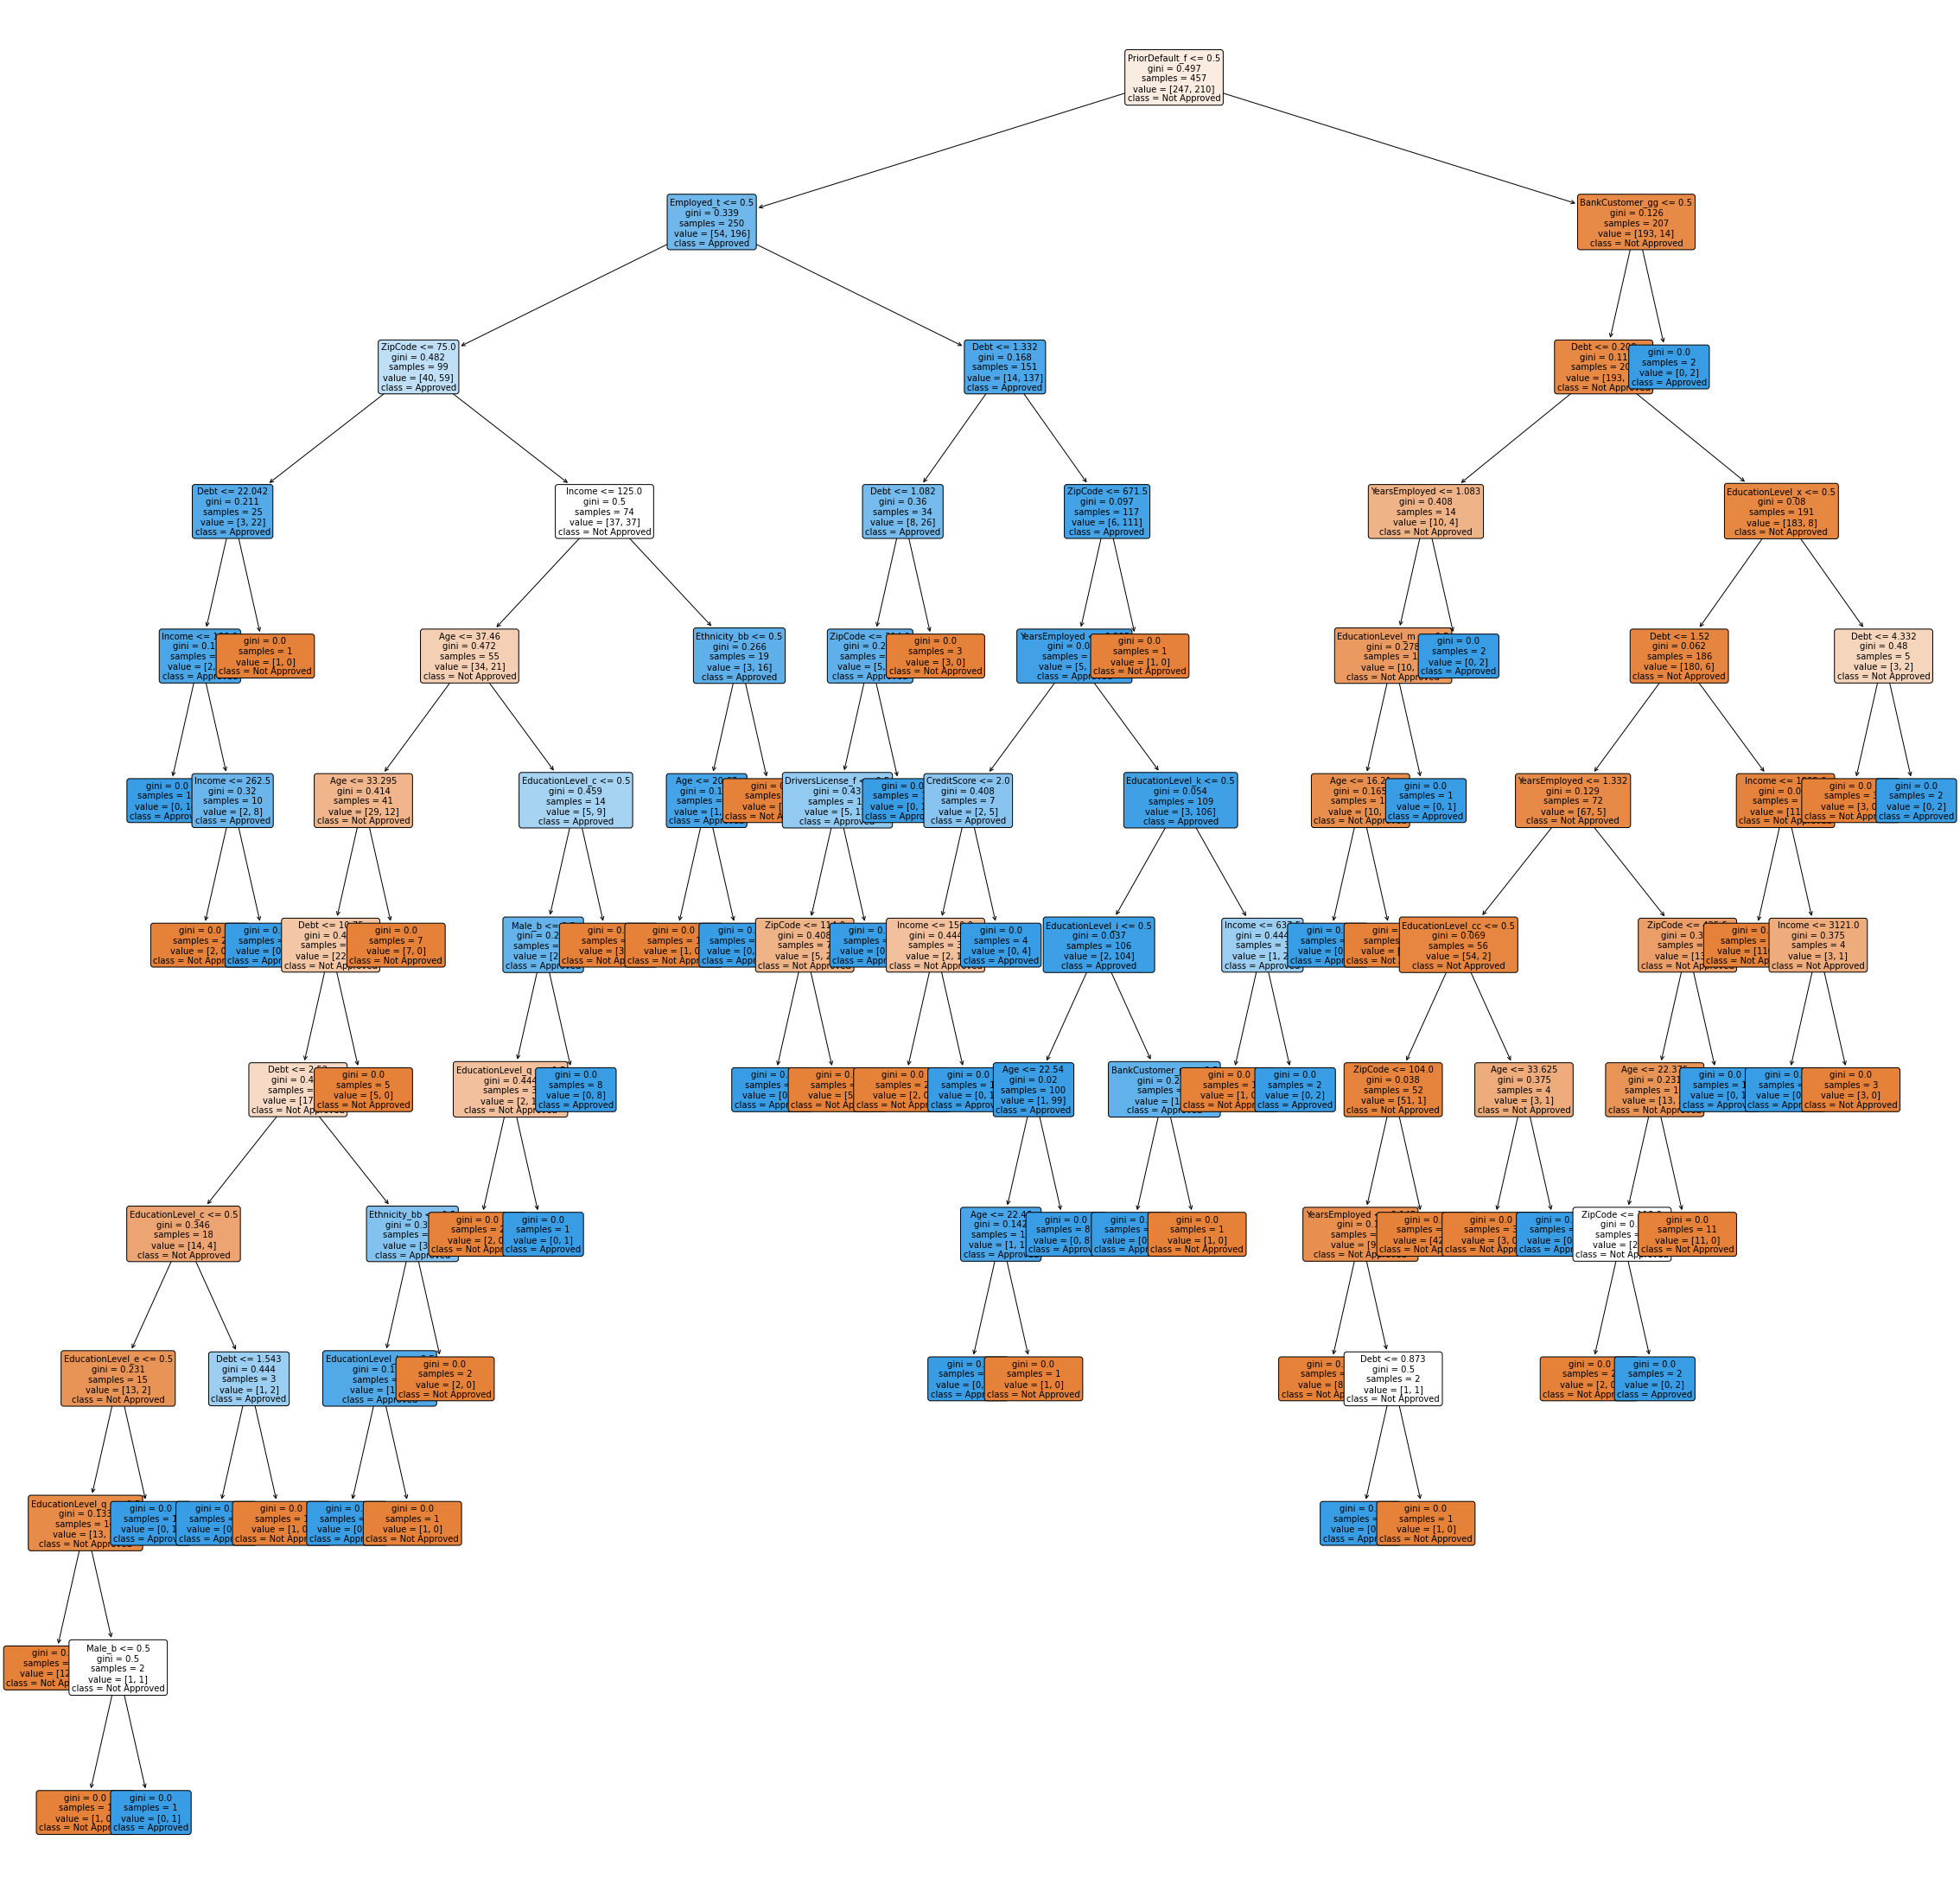

In [488]:
plt.figure(figsize=(40, 40))
tree.plot_tree(dtmodt, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, rounded=True, fontsize=10)
plt.show()

### Using the above data, it can be seen that the feature 38 holds the most significance, which makes sense as it indicates whether the person has defaulted previously or not. This makes sense as if a person has ever defaulted, trusting the individual again is a big risk, that it why this factor plays an important role in the decision making. Debt becomes important in scenarios where prior default is "No" the model considers the debt amount. One other important factor that is seen is whether the individual is a bank customer or not, which seems logical as banks would favor their customers.

In [492]:
#Q6

dect = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=99)
dectmodel = dect.fit(X_train, Y_train)
trainpred = dectmodel.predict(X_train)
acc = accuracy_score(trainpred, Y_train)
trainpred2 = dectmodel.predict(X_test)
acc2 = accuracy_score(trainpred2, Y_test)
print('Training Accuracy: ', acc * 100)
print('Training Accuracy: ', acc2 * 100)

Training Accuracy:  89.93435448577681
Training Accuracy:  88.77551020408163


In [493]:
text_representation = tree.export_text(dectmodel)
print(text_representation)

|--- feature_37 <= 0.50
|   |--- feature_40 <= 0.50
|   |   |--- feature_4 <= 75.00
|   |   |   |--- feature_1 <= 22.04
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  22.04
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  75.00
|   |   |   |--- feature_5 <= 125.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  125.00
|   |   |   |   |--- class: 1
|   |--- feature_40 >  0.50
|   |   |--- feature_1 <= 1.33
|   |   |   |--- feature_1 <= 1.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.08
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  1.33
|   |   |   |--- feature_4 <= 671.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  671.50
|   |   |   |   |--- class: 0
|--- feature_37 >  0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_1 <= 0.21
|   |   |   |--- feature_2 <= 1.08
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  1.08
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.21
|   |   |   |--- feat

### The initial model had a perfect training accuracy of 100%, but the testing accuracy was around 83%, which indicated that the model was too complex. An analysis was done and we saw that increasing the tree depth lowered the accuracy, leading to greater complexity. To address over-fitting, the decision tree was pruned to a maximum depth of 4, resulting in a slightly lower training accuracy of approximately 90%. However, the gap between training and testing accuracy narrowed to just about 1.15%, which was an improvement from the initial model. Pruning was instrumental in mitigating over-fitting by selecting the most important features for the model while making it more generalized. 

In [496]:
#Q7
numoftrnodes = [3,5,10,15,20,25,30,35,40,45,50,55,60]
for i in numoftrnodes:
    forest = RandomForestClassifier(n_estimators=i, random_state=99)
    forestmod = forest.fit(X_train, Y_train)
    train_pred = forestmod.predict(X_train)
    acc = accuracy_score(train_pred, Y_train) * 100
    testpred = forestmod.predict(X_test)
    acc2 = accuracy_score(testpred, Y_test) * 100
    print('Number of Trees: ', i, 'Training Accuracy: ', acc, 'Testing Accuracy: ', acc2)  

Number of Trees:  3 Training Accuracy:  96.71772428884027 Testing Accuracy:  87.24489795918367
Number of Trees:  5 Training Accuracy:  97.59299781181619 Testing Accuracy:  89.79591836734694
Number of Trees:  10 Training Accuracy:  98.6870897155361 Testing Accuracy:  88.77551020408163
Number of Trees:  15 Training Accuracy:  99.12472647702407 Testing Accuracy:  90.3061224489796
Number of Trees:  20 Training Accuracy:  99.78118161925602 Testing Accuracy:  91.83673469387756
Number of Trees:  25 Training Accuracy:  99.78118161925602 Testing Accuracy:  91.3265306122449
Number of Trees:  30 Training Accuracy:  100.0 Testing Accuracy:  91.3265306122449
Number of Trees:  35 Training Accuracy:  100.0 Testing Accuracy:  90.3061224489796
Number of Trees:  40 Training Accuracy:  100.0 Testing Accuracy:  90.81632653061224
Number of Trees:  45 Training Accuracy:  100.0 Testing Accuracy:  91.3265306122449
Number of Trees:  50 Training Accuracy:  100.0 Testing Accuracy:  91.83673469387756
Number of Tr

In [519]:
#Using estimator = 50

forest = RandomForestClassifier(n_estimators=50, random_state=99)
forestmod = forest.fit(X_train, Y_train)
train_predict = forestmod.predict(X_train)
testpredict = forestmod.predict(X_test)

Text(0.5, 0, 'Random Forest Feature Importance')

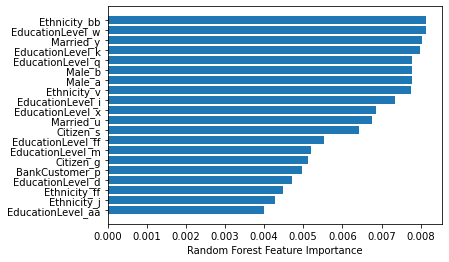

In [521]:
sorted_idx = forestmod.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][10:30], forestmod.feature_importances_[sorted_idx][10:30])
plt.xlabel("Random Forest Feature Importance")

### The bar chart above shows the importance of each feature in the model. Looking at the given chart, we can see that the most important feature is the ethnicity_bb. After that the most important feature is EducationLevel_w.

In [524]:
#Q8
decisiontreescore = cross_val_score(dectmodel, X, Y, cv=5)
print('Decision Tree: ', decisiontreescore.mean())
randomforestscore = cross_val_score(forestmod, X, Y, cv=5)
print('Random Forest: ', randomforestscore.mean())

Decision Tree:  0.8207633587786258
Random Forest:  0.8422665883734586


### Based on these results, the Random Forest model seems to perform slightly better than the Decision Tree model under the given cross-validation setup as it attained high accuracy without much adjustments, while the Decision Tree needed pruning to reach a level of accuracy near to the Random Forest one. This suggests that the Random Forest model may be a better choice for your specific data-set and problem as it is generally more flexible.

# Part 02

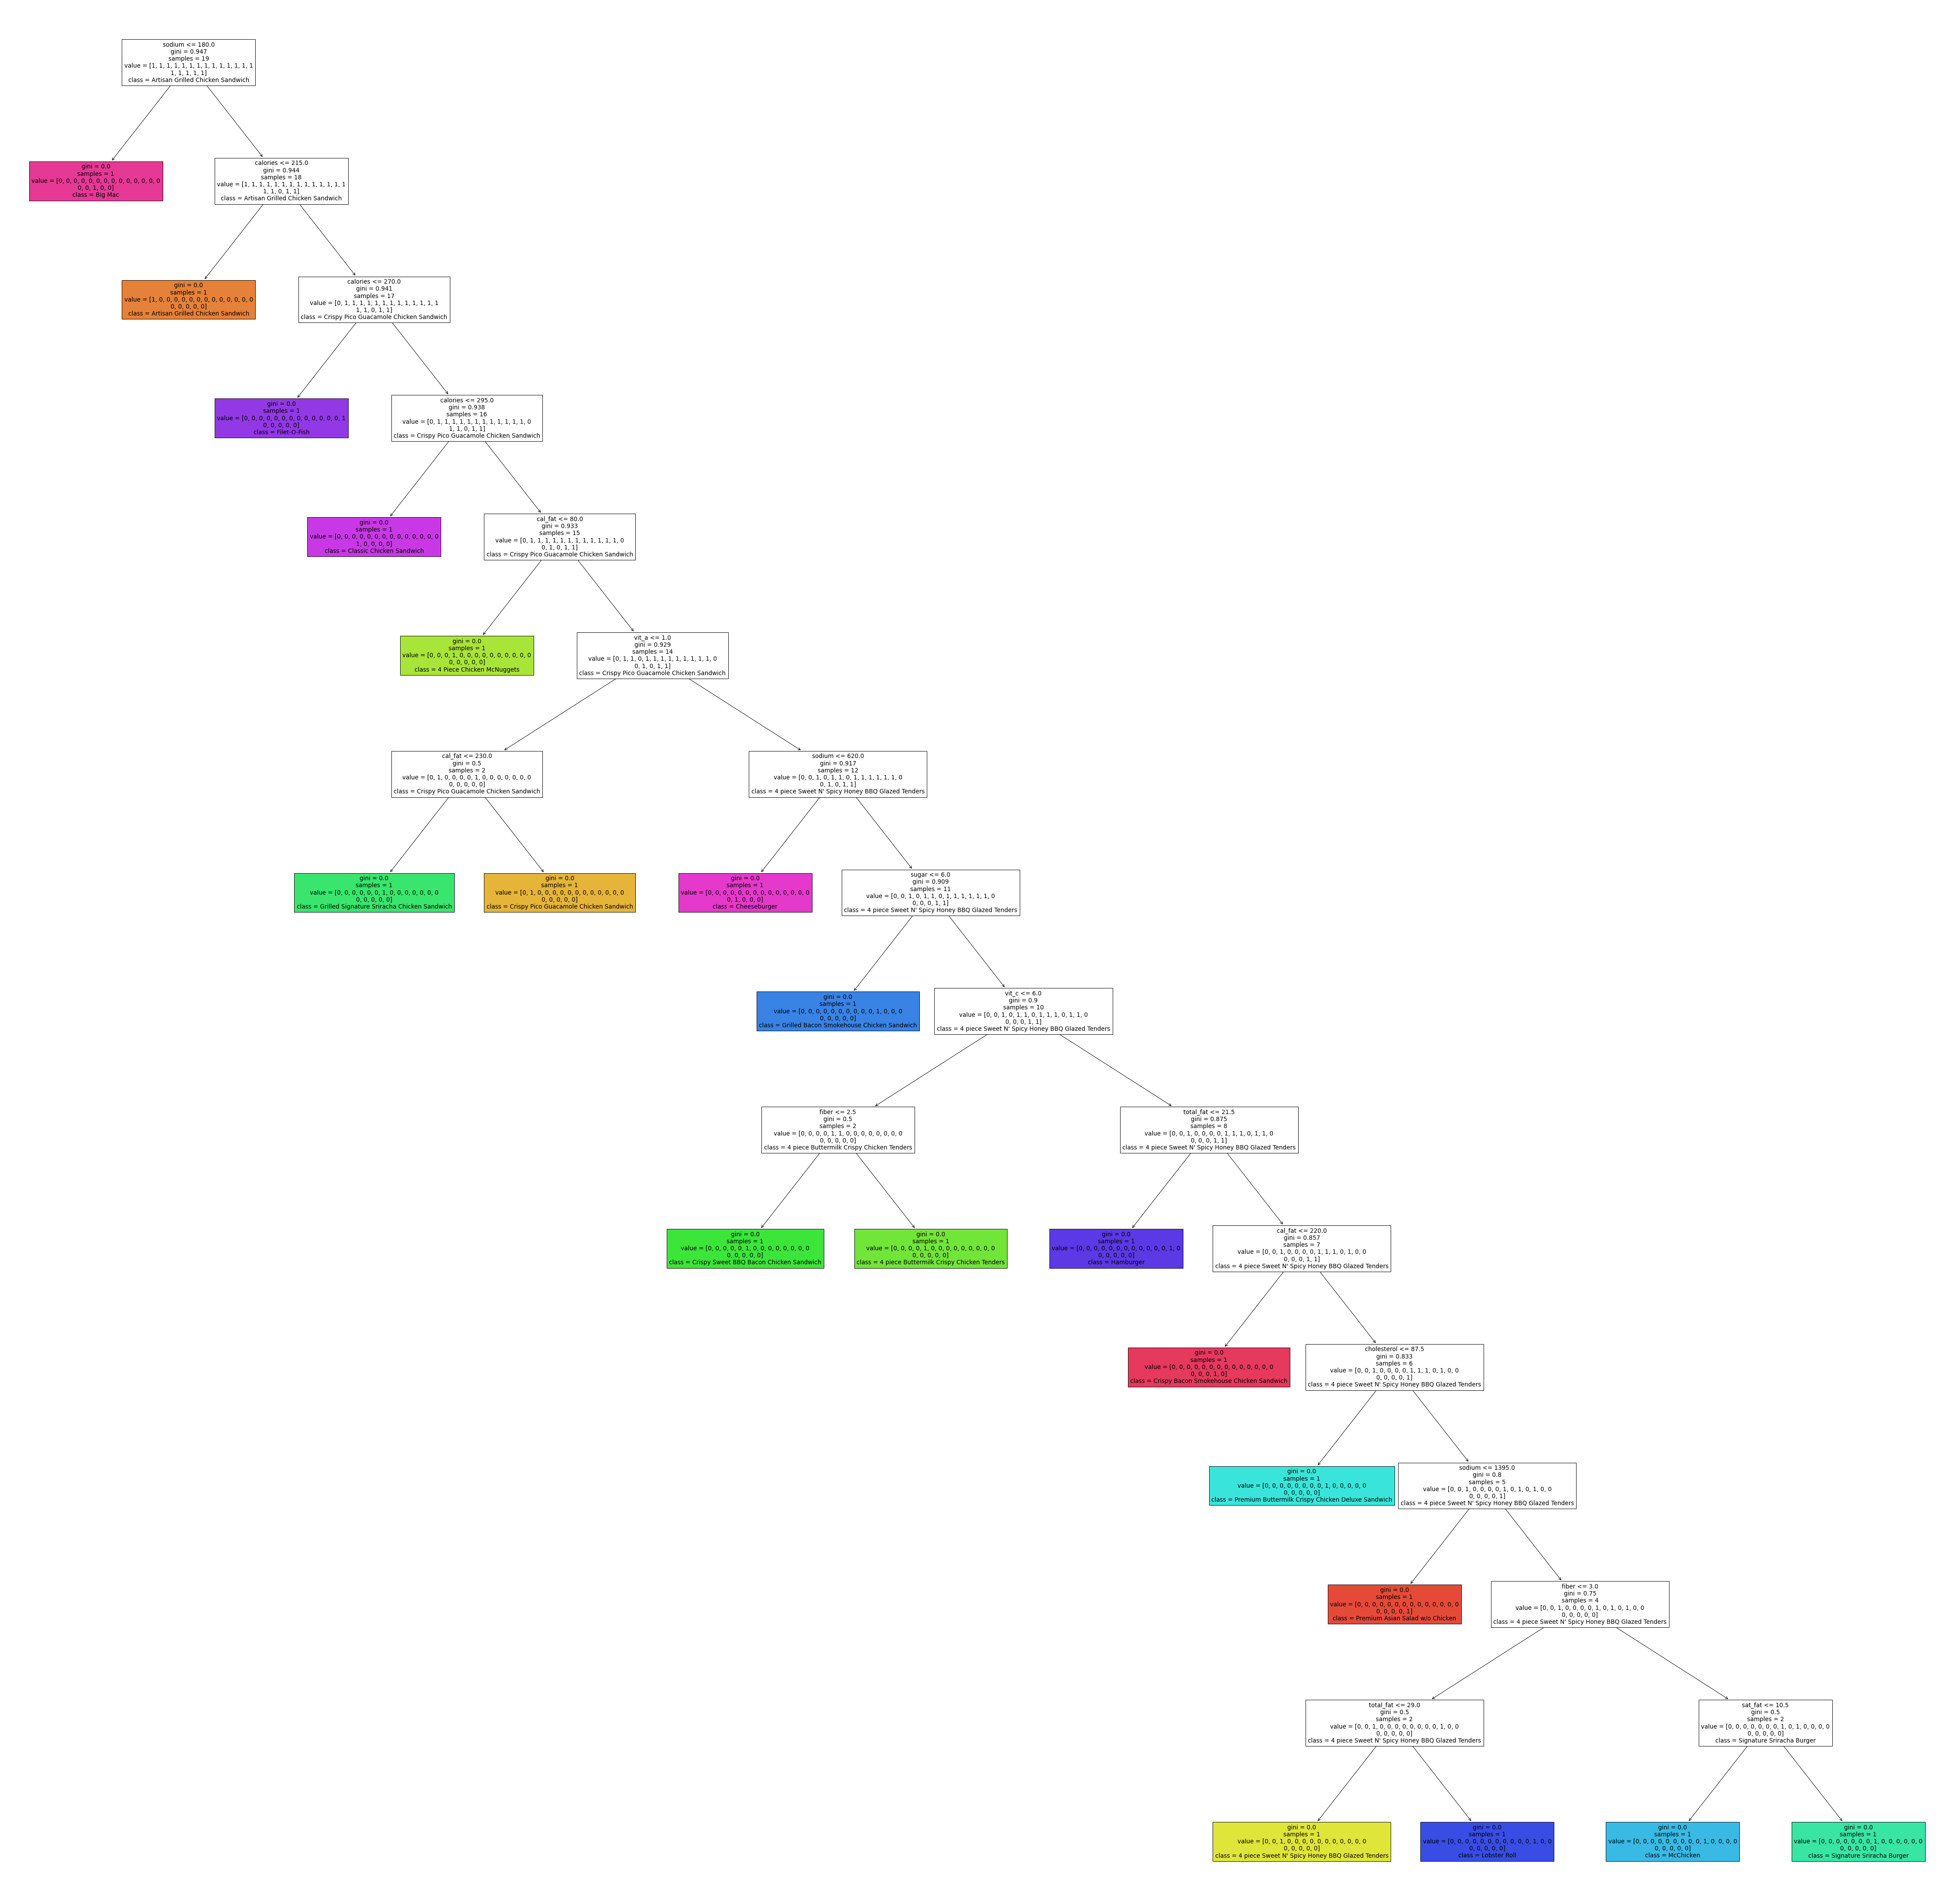

In [562]:
#Q1
df2 = pd.read_csv('mcdonalds.csv')
df2 = df2.drop('restaurant', axis=1)
X = df2.drop('item', axis=1)
Y = df2['item']
dt = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=99)
dtmod = dt.fit(X, Y)
dectreerepr = tree.export_text(dtmod)
fig = plt.figure(figsize=(80, 80))
_ = tree.plot_tree(dtmod,feature_names=list(X.columns),class_names=Y.value_counts().index.tolist(), filled=True)
fig.savefig("wine_decision_tree.png")

### To identify the three most commonly ordered food items, we analyze the leaf nodes of the decision tree and identify the ones that are close to each other. by looking at the graph, we can say that Premium Buttermilk Crispy Chicken Deluxe Sandwich, 4 Piece Sweetn'Spicy Honey BBQ Glazed Tenders, and Crispy Bacon Smoke House Chicken Sandwich could be considered related food items based on the decision tree.